# How does unemployment rate of different genders change from 1990 and how it relates to the GDP per capita

Imports and set magics:

In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 
import pandas_datareader  
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

%load_ext autoreload
%autoreload 2

# Fetch, merge and data processing

I first fetch the GDP data include GDP in purchasing power pariety and GDP growth rate from world bank database website by using API, also fetch unemployment rates for both male and female in those countries and merge 2 data sets together

In [2]:
from pandas_datareader import wb

In [3]:
# fetch gdp data of asian economics from 1990 to 2018
countries = ['CN','TH','MY','JP','KR','SG','VN','IN','ID','PH']
indicators = {'NY.GDP.MKTP.KD.ZG','NY.GDP.PCAP.CD'}
gdp = wb.download(indicator = indicators, country= countries, start=1990, end=2018)
gdp = gdp.rename(columns = {'NY.GDP.PCAP.CD':'GDP_per_capita','NY.GDP.MKTP.KD.ZG':'GDP_growth'})
gdp = gdp.reset_index()
gdp.head(10)

,country,year,GDP_per_capita,GDP_growth
0,China,2018,9770.847088,6.566974
1,China,2017,8759.041578,6.757008
2,China,2016,8078.790474,6.736675
3,China,2015,8033.388043,6.905317
4,China,2014,7651.366044,7.299519
5,China,2013,7050.645920,7.768615
6,China,2012,6316.918863,7.859627
7,China,2011,5618.132491,9.550914
8,China,2010,4550.453596,10.636140
9,China,2009,3832.235952,9.399813


convert year to make it an integer

In [4]:
gdp.year = gdp.year.astype(int)
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 4 columns):
country           290 non-null object
year              290 non-null int64
GDP_per_capita    290 non-null float64
GDP_growth        290 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.1+ KB


Fetch **unemployment rate** in those countries for both male and famale and set dataset name as un

In [5]:
countries = ['CN','TH','MY','JP','KR','SG','VN','IN','ID','PH']
indicators = {'SL.UEM.TOTL.MA.ZS','SL.UEM.TOTL.FE.ZS'}
un = wb.download(indicator = indicators, country=countries, start=1990, end=2018)
un = un.rename(columns = {'SL.UEM.TOTL.MA.ZS':'male_unemployment','SL.UEM.TOTL.FE.ZS':'female_unemployment'})
un = un.reset_index()
un.year = un.year.astype(int)
un.head(10)

,country,year,female_unemployment,male_unemployment
0,China,2018,3.703,4.722
1,China,2017,3.847,4.905
2,China,2016,3.929,5.010
3,China,2015,4.012,5.115
4,China,2014,3.994,5.093
5,China,2013,3.978,5.072
6,China,2012,3.960,5.049
7,China,2011,3.942,5.026
8,China,2010,3.923,5.002
9,China,2009,4.092,5.218


**Merge 2 data sets**:

In [6]:
data = pd.merge(gdp, un,how='outer',on = ['country','year'])
data.head(10)

,country,year,GDP_per_capita,GDP_growth,female_unemployment,male_unemployment
0,China,2018,9770.847088,6.566974,3.703,4.722
1,China,2017,8759.041578,6.757008,3.847,4.905
2,China,2016,8078.790474,6.736675,3.929,5.010
3,China,2015,8033.388043,6.905317,4.012,5.115
4,China,2014,7651.366044,7.299519,3.994,5.093
5,China,2013,7050.645920,7.768615,3.978,5.072
6,China,2012,6316.918863,7.859627,3.960,5.049
7,China,2011,5618.132491,9.550914,3.942,5.026
8,China,2010,4550.453596,10.636140,3.923,5.002
9,China,2009,3832.235952,9.399813,4.092,5.218


**group by**

now sort values by countries then year

In [7]:
data = data.sort_values(['country','year'])
data.head(5)

,country,year,GDP_per_capita,GDP_growth,female_unemployment,male_unemployment
28,China,1990,317.884673,3.907114,NaN,NaN
27,China,1991,333.142145,9.294076,2.060,2.627
26,China,1992,366.460692,14.216164,2.063,2.630
25,China,1993,377.389839,13.867576,2.335,2.977
24,China,1994,473.492279,13.052159,2.517,3.209


drop rows with missing 

In [8]:
data.dropna(inplace=True)
data.head(5)

,country,year,GDP_per_capita,GDP_growth,female_unemployment,male_unemployment
27,China,1991,333.142145,9.294076,2.060,2.627
26,China,1992,366.460692,14.216164,2.063,2.630
25,China,1993,377.389839,13.867576,2.335,2.977
24,China,1994,473.492279,13.052159,2.517,3.209
23,China,1995,609.656679,10.949227,2.610,3.328


use groupby to calculate means of unemployment rate for both male and female within countries

In [9]:
data.groupby('country')['female_unemployment'].mean()

country
China          3.404893
India          5.489000
Indonesia      5.956214
Japan          3.688821
Korea, Rep.    3.053357
Malaysia       3.615714
Philippines    3.805107
Singapore      4.341821
Thailand       1.371179
Vietnam        1.995857
Name: female_unemployment, dtype: float64

In [10]:
data.groupby('country')['male_unemployment'].mean()

country
China          4.341286
India          5.605036
Indonesia      4.851071
Japan          3.997500
Korea, Rep.    3.816250
Malaysia       3.139893
Philippines    3.326179
Singapore      3.836000
Thailand       1.331536
Vietnam        2.067714
Name: male_unemployment, dtype: float64

## Explore data set

In order to be able to explore the raw data, provide both static interactive plot to show gdp growth rate and unemployment rate for both male and female in each country

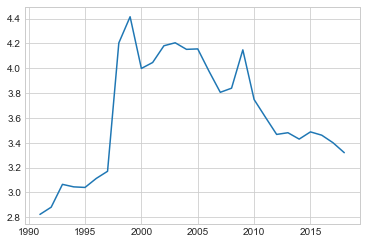

In [11]:
# first calculate the average of male unemployment and female unemployment name them m_mean, f_mean
m_mean = data.groupby('year')['male_unemployment'].mean()
f_mean = data.groupby('year')['female_unemployment'].mean()
# I have different year oberservations in origional data thus create an new data with the same year observations with m_mean and f_mean and name it J
J = data[data.country == 'China']
# plots
plt.plot(J.year, m_mean,label='Average male unemployment rate overtime')

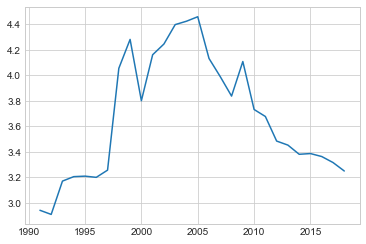

In [12]:
plt.plot(J.year, f_mean,label='Average female unemployment rate overtime')

In [13]:
# first make an interactive plot of GDP growth rate.
import ipywidgets as widgets
def plot_0(df, country): 
    I = df['country'] == country
    ax=df.loc[I,:].plot(x='year', y='GDP_growth', style='-o', legend=False)

In [14]:
widgets.interact(plot_0, 
    df = widgets.fixed(data),
    country = widgets.Dropdown(description='country', 
                                    options=data.country.unique(), 
                                    value='China')
); 

interactive(children=(Dropdown(description='country', options=('China', 'India', 'Indonesia', 'Japan', 'Korea,…

In [15]:
# then make an interactive plot of male unemployment 
import ipywidgets as widgets
def plot(df, country): 
    I = df['country'] == country
    ax=df.loc[I,:].plot(x='year', y='male_unemployment', style='-o', legend=False)

In [16]:
widgets.interact(plot, 
    df = widgets.fixed(data),
    country = widgets.Dropdown(description='country', 
                                    options=data.country.unique(), 
                                    value='China')
); 

interactive(children=(Dropdown(description='country', options=('China', 'India', 'Indonesia', 'Japan', 'Korea,…

In [17]:
# after that make an interactive plot of female unemployment 
import ipywidgets as widgets
def plot(df, country): 
    I = df['country'] == country
    ax=df.loc[I,:].plot(x='year', y='female_unemployment', style='-o', legend=False)
widgets.interact(plot, 
    df = widgets.fixed(data),
    country = widgets.Dropdown(description='country', 
                                    options=data.country.unique(), 
                                    value='China')
); 

interactive(children=(Dropdown(description='country', options=('China', 'India', 'Indonesia', 'Japan', 'Korea,…

# Analysis

use groupby and describe to calculte mean and standard deviation of unemployment rate for male and female

In [18]:
data.groupby('country')['male_unemployment'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
China,28.0,4.341286,0.869143,2.627,3.58925,4.8545,5.03175,5.218
India,28.0,5.605036,0.131646,5.303,5.55300,5.6570,5.69350,5.797
Indonesia,28.0,4.851071,1.285286,2.328,4.12875,4.7895,5.77950,6.953
Japan,28.0,3.997500,1.057395,2.018,3.27750,4.1530,4.83150,5.564
"Korea, Rep.",28.0,3.816250,1.200802,2.311,3.27650,3.6535,3.93825,7.812
Malaysia,28.0,3.139893,0.337500,2.236,2.95625,3.1455,3.37300,3.700
Philippines,28.0,3.326179,0.367146,2.125,3.34300,3.4255,3.49825,3.876
Singapore,28.0,3.836000,0.944380,2.176,3.33375,3.6500,4.06325,5.752
Thailand,28.0,1.331536,0.772561,0.500,0.75450,1.1710,1.61975,3.411


In [19]:
data.groupby('country')['female_unemployment'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
China,28.0,3.404893,0.681646,2.060,2.81500,3.8070,3.94650,4.092
India,28.0,5.489000,0.165089,5.060,5.38400,5.5010,5.62250,5.741
Indonesia,28.0,5.956214,2.159204,2.814,4.18675,5.6310,7.49975,10.053
Japan,28.0,3.688821,0.862363,2.178,3.08975,3.8015,4.41875,5.159
"Korea, Rep.",28.0,3.053357,0.903503,1.582,2.49725,3.0360,3.46725,5.655
Malaysia,28.0,3.615714,0.474015,2.604,3.31275,3.6545,3.81025,4.844
Philippines,28.0,3.805107,0.426085,2.676,3.77500,3.9025,4.06475,4.330
Singapore,28.0,4.341821,1.078236,2.186,3.63625,4.2920,4.60600,6.547
Thailand,28.0,1.371179,0.841359,0.476,0.73575,1.1185,1.62425,3.430


From statistics result shown above, I have found that China, Japan and Vietnam have higher average male unemployment rate while the other asian countries have relatively higher female unemployment rate. When it comes to standard deviation, China,Japan and Korea has higher standard deviation for male unemployment rates while India,Indonesia, Philippines, Thailand and Singapore has higher stanard deviation for female unemployment rates.

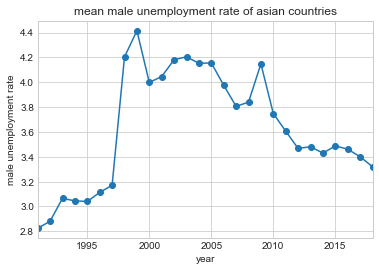

In [20]:
# Plot statistics: Dispersion in male unemployment rate across countries over time.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data.groupby('year')['male_unemployment'].mean().plot(ax=ax,style='-o')
ax.set_ylabel('male unemployment rate')
ax.set_title('mean male unemployment rate of asian countries');

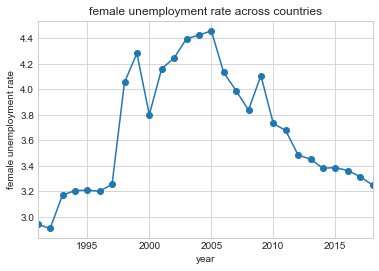

In [21]:
# similarly plot dispersion in female unemployment rare across countries over time 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data.groupby('year')['female_unemployment'].mean().plot(ax=ax,style='-o')
ax.set_ylabel('female unemployment rate')
ax.set_title('female unemployment rate across countries');

From 2 plots above can obeserve that the trend of unemployment rate change for both male and female are fairly similar over time, meanwhile female has slightly higher unemployement rate over male across Asian countries.

In [22]:
# calculate within countries mean of male unemployment rate.
# split
male_group = data.groupby('country')['male_unemployment']
# apply
male_mean = male_group.mean()
male_mean

country
China          4.341286
India          5.605036
Indonesia      4.851071
Japan          3.997500
Korea, Rep.    3.816250
Malaysia       3.139893
Philippines    3.326179
Singapore      3.836000
Thailand       1.331536
Vietnam        2.067714
Name: male_unemployment, dtype: float64

In [23]:
# name the mean unemployment for male over countries as male_mean.
male_mean.name = 'male_mean'
# combine new dataset to the old one.
data0 = data.set_index('country').join(male_mean, how='left')
data0['diff_male'] = data0.male_unemployment - data0.male_mean
data0.xs('China').head(5)

,year,GDP_per_capita,GDP_growth,female_unemployment,male_unemployment,male_mean,diff_male
country,,,,,,,
China,1991,333.142145,9.294076,2.060,2.627,4.341286,-1.714286
China,1992,366.460692,14.216164,2.063,2.630,4.341286,-1.711286
China,1993,377.389839,13.867576,2.335,2.977,4.341286,-1.364286
China,1994,473.492279,13.052159,2.517,3.209,4.341286,-1.132286
China,1995,609.656679,10.949227,2.610,3.328,4.341286,-1.013286


Text(0, 0.5, 'difference to mean(male)')

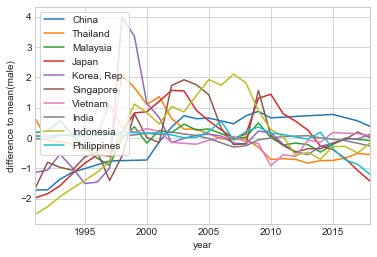

In [24]:
# plot the difference of male mean unemployment over asian countries: china, indonesia, philippines, malaysia and thailand
countries = ['China','Thailand','Malaysia','Japan','Korea, Rep.','Singapore','Vietnam','India','Indonesia','Philippines']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i in countries:
    data0.xs(i).plot(x='year',y='diff_male',ax=ax,label=i)

ax.legend(frameon=True)
ax.set_ylabel('difference to mean(male)')

Similarly calculate the mean of unemployment rate for female, create the new dataset, join to the old one, and plot the differences of female mean unemployment rate over asian countries.

In [25]:
# split
female_group = data.groupby('country')['female_unemployment']
# apply
female_mean = female_group.mean()
# name the mean unemployment for female over countries as female_mean.
female_mean.name = 'female_mean'
# combine new dataset to the old one.
data1 = data.set_index('country').join(female_mean, how='left')
data1['diff_female'] = data1.female_unemployment - data1.female_mean
# print the part of new dataset
data1.xs('China').head(5)

,year,GDP_per_capita,GDP_growth,female_unemployment,male_unemployment,female_mean,diff_female
country,,,,,,,
China,1991,333.142145,9.294076,2.060,2.627,3.404893,-1.344893
China,1992,366.460692,14.216164,2.063,2.630,3.404893,-1.341893
China,1993,377.389839,13.867576,2.335,2.977,3.404893,-1.069893
China,1994,473.492279,13.052159,2.517,3.209,3.404893,-0.887893
China,1995,609.656679,10.949227,2.610,3.328,3.404893,-0.794893


Text(0, 0.5, 'difference to mean(female)')

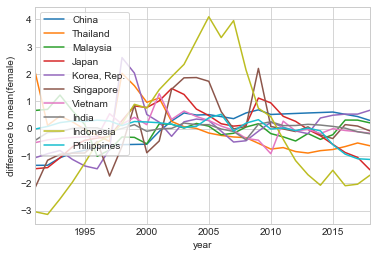

In [26]:
countries = ['China','Thailand','Malaysia','Japan','Korea, Rep.','Singapore','Vietnam','India','Indonesia','Philippines']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i in countries:
    data1.xs(i).plot(x='year',y='diff_female',ax=ax,label=i)

ax.legend(frameon=True)
ax.set_ylabel('difference to mean(female)')

From the plot above have observed that the difference to mean for female is more severely fluctuated in some countries like indonesia, for male korea, but in the other contries the changing patterns are nearly the same. Thus in some countries female are more vulnerable under worse economic situations, but can not say that in general female are more vulnerable under worse economic situations in emerging economics 

Finally I calculate the correlation between gdp growth and unemployment rates for both male and female

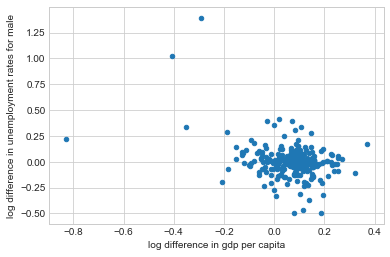

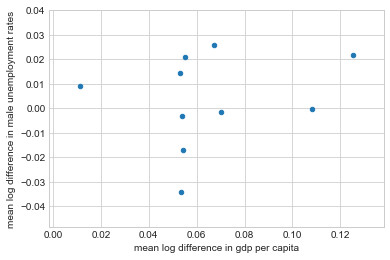

In [27]:
# first take logs on male unemployment(%) and GDP per capita (%) named as 'log_male' and 'log_gdp_per_capita'
data['log_male'] = np.log(data['male_unemployment'])
data['log_gdp_per_capita'] = np.log(data['GDP_per_capita'])

# then plot 2 figures, figure 1 shows log differences
ax = data.groupby('country').diff(1).plot(x = 'log_gdp_per_capita', y = 'log_male', kind = 'scatter'); 
ax.set_xlabel('log difference in gdp per capita') 
ax.set_ylabel('log difference in unemployment rates for male')

# figur 2 shows mean log differences
ax = data.groupby('country').agg(lambda x: np.mean(x.diff())).plot(x = 'log_gdp_per_capita', y = 'log_male', kind = 'scatter'); 
ax.set_xlabel('mean log difference in gdp per capita')
ax.set_ylabel('mean log difference in male unemployment rates'); 

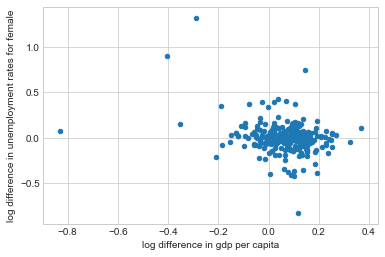

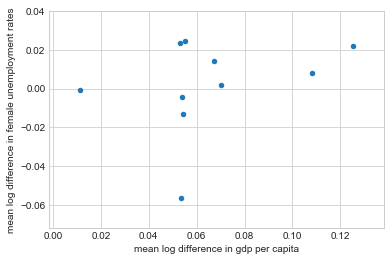

In [28]:
# take logs on female unemployment(%)  also and GDP per capita (%) named as 'log_female' and 'log_gdp_per_capita'
data['log_female'] = np.log(data['female_unemployment'])
data['log_gdp_per_capita'] = np.log(data['GDP_per_capita'])

# then plot 2 figures, figure 1 shows log differences
ax = data.groupby('country').diff(1).plot(x = 'log_gdp_per_capita', y = 'log_female', kind ='scatter'); 
ax.set_xlabel('log difference in gdp per capita') 
ax.set_ylabel('log difference in unemployment rates for female')

# figur 2 shows mean log differences
ax = data.groupby('country').agg(lambda x: np.mean(x.diff())).plot(x = 'log_gdp_per_capita', y = 'log_female', kind = 'scatter'); 
ax.set_xlabel('mean log difference in gdp per capita')
ax.set_ylabel('mean log difference in female unemployment rates'); 

From two scatter plots above can not find the significant correlation between GDP growth rate and male or female unemployment rate. 

# Conclusion

In the first part fetch unemployment data and GDP growth data from world bank database, combine 2 datasets into a new dataset called 'data' and remove the rows with missing. Then drew static plots and intercative plots and find out the changing pattern of average unemployment rates. I have noticed that the average unemployment rate for different Asian countries are different, China, Japan and Vietnam have relatively higher overtime male unemployment rate while the other Asian countries have higher female unemployment rate. The dispersion of unemployment rates in different countries are different as well, Indonesia and Korea has exceptionally high fluctuation in female and male unemployment. Lastly I have not obeserved the correlation relation between GDP per capita, thus the cause of unemployment rate can not be clarified in this project.